In [2]:
import pickle as pk

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from common import *
from util import *

# Load everything

MODEL_NAME = "LinearRegression"
RUN_INFO_FILEPATH = model_name_to_run_info_filepath(MODEL_NAME)

run_info = pk.load(open(RUN_INFO_FILEPATH, "rb"))
history_dict = run_info["history"]
preds = run_info["predictions"]

scaled_data = {}
with np.load(PREPROCESSED_DATASET_FILEPATH) as npz_loader:
    for key in npz_loader.files:
        print("{}: {}".format(key, npz_loader[key].shape))
        scaled_data[key] = npz_loader[key]
scaler = pk.load(open(PREPROCESSING_SCALER_FILEPATH, "rb"))

# Input and output dims
input_shape = tuple(list(scaled_data['x_train'].shape)[1:])
output_shape = tuple(list(scaled_data['y_train'].shape)[1:])
input_dims = np.product(input_shape)
output_dims = np.product(output_shape)

# Load train, val, test data
directory = DATASET_DIRECTORY
data = {}

for split in ['train','val','test']:
    data_split = np.load(os.path.join(directory, split + ".npz"))
    data['x_'+split] = data_split['x']
    data['y_'+split] = data_split['y']

x_train: (23974, 12, 207, 2)
y_train: (23974, 12, 207, 2)
x_val: (3425, 12, 207, 2)
y_val: (3425, 12, 207, 2)
x_test: (6850, 12, 207, 2)
y_test: (6850, 12, 207, 2)


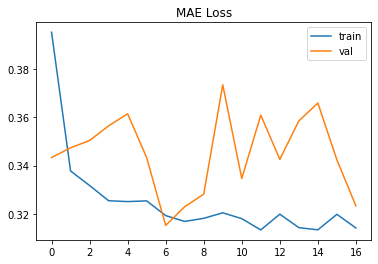

In [3]:
# Plot training and validation loss
plt.figure()
plt.title("MAE Loss")
plt.plot(history_dict['loss'],label='train')
plt.plot(history_dict['val_loss'],label='val')
plt.legend()

<BarContainer object of 12 artists>

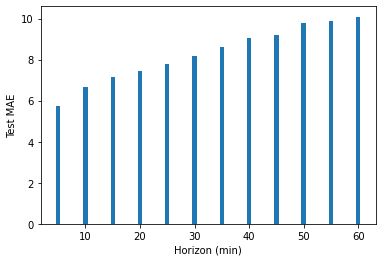

In [4]:
# MAE Loss
mae_losses = np.mean(np.abs(preds['test']-data['y_test']),axis=(0,2))[:,0]
plt.xlabel("Horizon (min)")
plt.ylabel("Test MAE")
plt.bar(np.arange(1,13)*5,mae_losses)

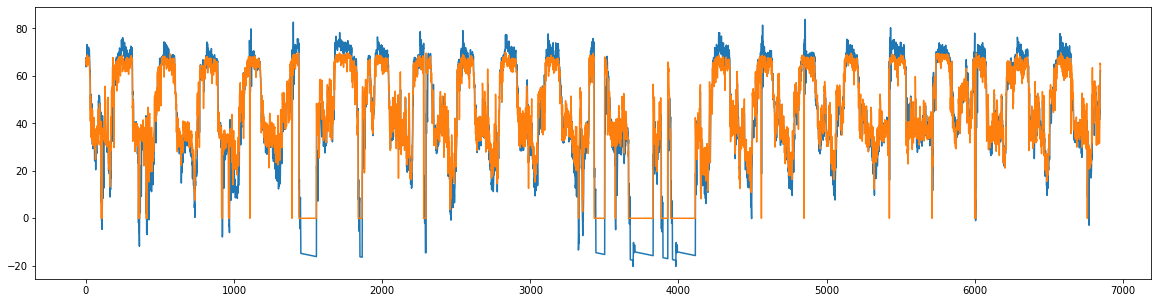

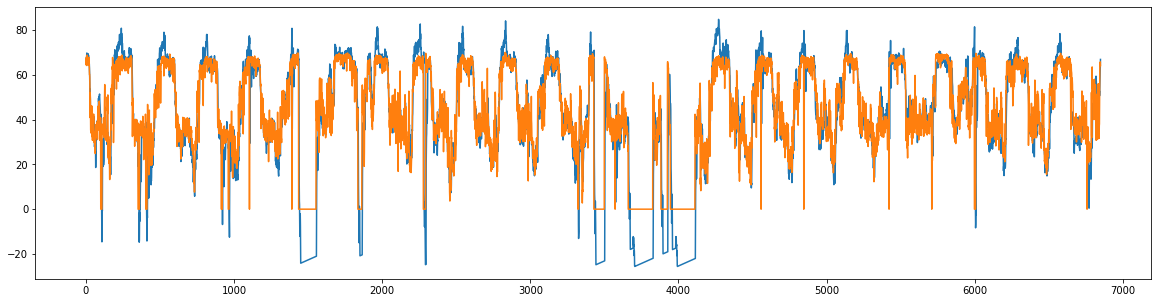

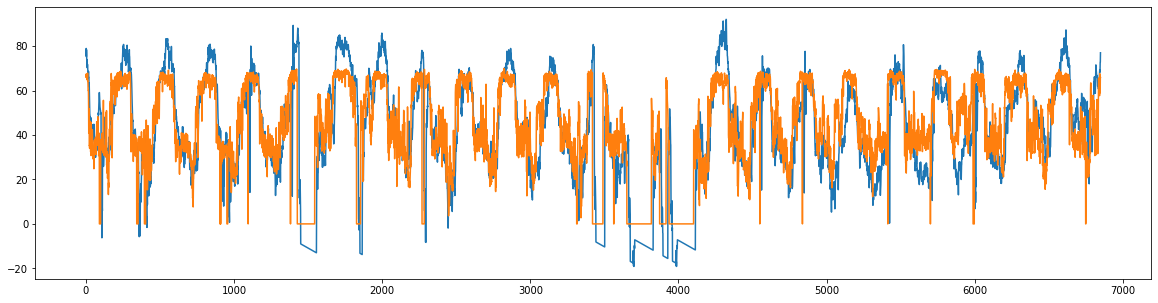

In [5]:
# Example 5 minute horizon prediction from Sensor 15
plt.figure(figsize=(20,5))
plt.plot(preds['test'][:,0,15,0])
plt.plot(data['y_test'][:,0,15,0])

# Example 15 minute horizon prediction from Sensor 15
plt.figure(figsize=(20,5))
plt.plot(preds['test'][:,2,15,0])
plt.plot(data['y_test'][:,2,15,0])

# Example 60 minute horizon prediction from Sensor 15
plt.figure(figsize=(20,5))
plt.plot(preds['test'][:,-1,15,0])
plt.plot(data['y_test'][:,-1,15,0])